# Scrapping Subreddit Data to determine the impact of key words and emojis

In [2]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [3]:
import praw 
import pandas as pd
import re
import matplotlib.pyplot as plt

## Reddit scrapping bot

Bot description

In [4]:
reddit = praw.Reddit(client_id='********', client_secret='******secretkey******', user_agent='WebScrapping')

Version 7.6.0 of praw is outdated. Version 7.6.1 was released Friday November 11, 2022.


Interesting command

In [5]:
hot_posts = reddit.subreddit('crypto').top(limit=600)
hot_posts

## Storing the collected data into a .csv file locally

In [7]:
posts = []
name='crypto'
ml_subreddit = reddit.subreddit(name)
for post in ml_subreddit.hot(limit=600): # top, new or hot commands
    
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns = ['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

path=str(r'C:\Users\pizza\Desktop\%s%s'%(name,'.csv'))

posts.to_csv(path, index = False)
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Crypto is not cryptocurrency,607,7jrba2,crypto,http://www.cryptoisnotcryptocurrency.com,206,,1.513255e+09
1,Temporary change to address horrendous levels ...,205,orjy46,crypto,https://www.reddit.com/r/crypto/comments/orjy4...,581,##Edit: Due to a recent even more extreme incr...,1.627247e+09
2,finding the key to monoalphabetic cipher decry...,7,z4gsqt,crypto,https://www.reddit.com/r/crypto/comments/z4gsq...,3,I was Given a monoalphabetic cipher text to d...,1.669392e+09
3,Emperor Charles V's secret code cracked,73,z41z8k,crypto,https://phys.org/news/2022-11-emperor-charles-...,3,,1.669345e+09
4,How in practice work E2EE and why community wa...,3,z4bwze,crypto,https://www.reddit.com/r/crypto/comments/z4bwz...,2,How in practice work E2EE and why usually comm...,1.669378e+09
...,...,...,...,...,...,...,...,...
595,How much does undergrad prestige matter when a...,23,pj3jk5,crypto,https://www.reddit.com/r/crypto/comments/pj3jk...,38,I know there are lots and lots of general ques...,1.630948e+09
596,Is pretty good privacy an encryption algorithm...,0,pi9xek,crypto,https://www.reddit.com/r/crypto/comments/pi9xe...,17,"Hello, quick question here, i'm trying to unde...",1.630834e+09
597,The RISC-V Scalar Cryptography Extension has r...,40,phe2si,crypto,https://github.com/riscv/riscv-crypto/releases,40,,1.630704e+09
598,"Hat.sh V2 release - simple, fast, secure clien...",21,pghvas,crypto,/r/privacytoolsIO/comments/pftsnu/hatsh_v2_rel...,50,,1.630589e+09


## Opening .csv file to access the data

In [8]:
opened_file = open("C:/Users/pizza/Desktop/" + name + ".csv", encoding = "utf8")
from csv import reader
read_file = reader(opened_file)
posts_data = list(read_file)

Since our goal is to determine the impact of key words in the post engagement, our first approach is to split the `title` items into a list of of strings. Emoji impact will also be taken into account, thus the reason for using the following `.split` method from the Regex Python library.

In [9]:
title_list=[]
for row in posts_data[1:]:
    text=row[0]
    title=re.split('(\W)', text)
    title_list.append(title)
    
#title_list

The code in the cell above gives a list of lists where each row is composed of a list of words and special characters (including spaces, commas, question marks, etc). This approach will come in useful for future analysis. 

## Unique word filter

We define a function to filter out repeated words in the same title. This way we create a list of words containing only unique words and characters for every title.

In [10]:
def unique_word_counter (a_list):
    complete_list=[]
    for title in a_list:
        new_list=[]
        n=0
        while n < len(title):
            word=title[n]
            if word not in new_list:
                new_list.append(word)
            elif word in new_list: 
                pass
            n=n+1
        complete_list.append(new_list)
    return complete_list

new_title_list=unique_word_counter(title_list)
print(new_title_list[:5])

[['Crypto', ' ', 'is', 'not', 'cryptocurrency'], ['Temporary', ' ', 'change', 'to', 'address', 'horrendous', 'levels', 'of', 'spam'], ['finding', ' ', 'the', 'key', 'to', 'monoalphabetic', 'cipher', 'decryption', '.', ''], ['Emperor', ' ', 'Charles', 'V', "'", 's', 'secret', 'code', 'cracked'], ['How', ' ', 'in', 'practice', 'work', 'E2EE', 'and', 'why', 'community', 'warns', 'against', 'JavaScript', 'during', 'some', 'files', 'upload', '?', '']]


## Parallel iteration through 2 arrays

Iterating through ``new_title_list`` and the `posts_data` arrays in order to add to each row information regarding the post number of upvotes and the post number of comments.

In [11]:
listanueva=[]
for f, b in list(zip(new_title_list, posts_data[1:])):
    listanueva.append(f + [b[1], b[5]])
print(listanueva[:5])

[['Crypto', ' ', 'is', 'not', 'cryptocurrency', '607', '206'], ['Temporary', ' ', 'change', 'to', 'address', 'horrendous', 'levels', 'of', 'spam', '205', '581'], ['finding', ' ', 'the', 'key', 'to', 'monoalphabetic', 'cipher', 'decryption', '.', '', '7', '3'], ['Emperor', ' ', 'Charles', 'V', "'", 's', 'secret', 'code', 'cracked', '73', '3'], ['How', ' ', 'in', 'practice', 'work', 'E2EE', 'and', 'why', 'community', 'warns', 'against', 'JavaScript', 'during', 'some', 'files', 'upload', '?', '', '3', '2']]


## Cleaning irrelevant characters and lower casing all words

Note that I intentionally maintained the punctuation characters of `,` and `.` in order to determine in future versions if long or complex syntax titles get more upvotes. 

In [12]:
cleaned=[]
clean=[]
for title in listanueva:
    for word in title: 
        if word == " " or word =="":
            title.remove(word)
        else:
            word=word.lower()
            clean.append(word)
    cleaned.append(clean)
print(cleaned[:5]) 

[['crypto', 'not', 'cryptocurrency', '607', '206', 'temporary', 'to', 'address', 'horrendous', 'levels', 'of', 'spam', '205', '581', 'finding', 'key', 'to', 'monoalphabetic', 'cipher', 'decryption', '.', '3', 'emperor', 'v', "'", 's', 'secret', 'code', 'cracked', '73', '3', 'how', 'practice', 'work', 'e2ee', 'and', 'why', 'community', 'warns', 'against', 'javascript', 'during', 'some', 'files', 'upload', '?', '2', 'github', '-', 'zama', 'ai', '/', 'bounty', 'program', ':', 'an', 'experimental', 'to', 'encourage', 'the', 'fhe', 'community', 'help', 'move', 'space', 'forward', 'and', 'get', 'rewarded', 'along', 'way', ',', 'awarding', 'more', 'than', '€', '500', '000', 'people', 'who', 'contribute', 'making', 'better', '.', '8', '2', 'can', 'point', 'me', 'to', 'various', 'ssl', 'x25519', '-', 'add', 'implementations', '?', '4', 'towards', '-', 'to', 'encryption', 'for', 'direct', 'messages', 'in', 'the', 'fediverse', '80', '11', 'does', 'difficulty', 'of', 'attempting', 'to', 'calculate

## Relevant data

We create different dictionaries to store the global amount of upvotes and comments for each word or special character. Additionally we also count the amount of times a unique word or character has been posted. Note that words appearing more than once in the same title will not be taken into account. 

In [13]:
upvotes_dictionary={}
for row in listanueva:
    for word in row[:-2]:
        score = int(row[-2])
    
        if word in upvotes_dictionary:
            upvotes_dictionary[word] = upvotes_dictionary[word] + score
        
        elif word not in upvotes_dictionary:
            upvotes_dictionary[word] = score

In [14]:
comments_dictionary={}
for row in listanueva:
    for word in row[:-2]:
        comments = int(row[-1])
    
        if word in comments_dictionary:
            comments_dictionary[word] = comments_dictionary[word] + score
        
        elif word not in comments_dictionary:
            comments_dictionary[word] = score
comments_dictionary

{'Crypto': 35,
 'is': 259,
 'not': 49,
 'cryptocurrency': 7,
 'Temporary': 7,
 'change': 7,
 'to': 735,
 'address': 21,
 'horrendous': 7,
 'levels': 7,
 'of': 609,
 'spam': 7,
 'finding': 14,
 'the': 770,
 'key': 203,
 'monoalphabetic': 7,
 'cipher': 98,
 'decryption': 7,
 '.': 497,
 'Emperor': 7,
 'Charles': 14,
 'V': 21,
 "'": 273,
 's': 259,
 'secret': 28,
 'code': 28,
 'cracked': 7,
 'How': 336,
 'in': 602,
 'practice': 14,
 'work': 35,
 'E2EE': 7,
 'and': 924,
 'why': 28,
 'community': 420,
 'warns': 7,
 'against': 35,
 'JavaScript': 21,
 'during': 7,
 'some': 42,
 'files': 35,
 'upload': 7,
 '?': 1127,
 'GitHub': 14,
 '': 105,
 '-': 1029,
 'zama': 7,
 'ai': 7,
 '/': 140,
 'bounty': 7,
 'program': 14,
 ':': 427,
 'An': 42,
 'experimental': 7,
 'encourage': 7,
 'FHE': 119,
 'help': 84,
 'move': 7,
 'space': 14,
 'forward': 14,
 'get': 21,
 'rewarded': 7,
 'along': 7,
 'way': 56,
 ',': 392,
 'awarding': 7,
 'more': 21,
 'than': 35,
 '€': 7,
 '500': 7,
 '000': 21,
 'people': 14,
 'wh

In [15]:
count_dictionary={}
for row in listanueva:
    for word in row[:-2]:
    
        if word in count_dictionary:
            count_dictionary[word] = count_dictionary[word] + 1
        
        elif word not in count_dictionary:
            count_dictionary[word] = 1 

In [16]:
mean_dictionary = {x:float(upvotes_dictionary[x])/count_dictionary[x] for x in count_dictionary}

In [17]:
dict(sorted(upvotes_dictionary.items(), key=lambda item: item[1], reverse=True))

{'-': 4493,
 'the': 3437,
 '?': 2957,
 'and': 2909,
 'to': 2813,
 'in': 2523,
 '.': 2450,
 'for': 2396,
 'a': 2351,
 'of': 2248,
 ':': 2014,
 ',': 1917,
 'cryptography': 1910,
 'is': 1708,
 's': 1441,
 ')': 1406,
 '(': 1403,
 "'": 1309,
 'on': 1253,
 'The': 1134,
 'thread': 1079,
 'How': 1070,
 ' ': 1013,
 'encryption': 945,
 '’': 937,
 'community': 861,
 'with': 861,
 'not': 860,
 'Weekly': 850,
 'meta': 850,
 'A': 834,
 'Encryption': 813,
 'from': 802,
 'Crypto': 796,
 'Cryptography': 775,
 'I': 645,
 'using': 641,
 'Linux': 622,
 'by': 619,
 '"': 611,
 'cryptocurrency': 607,
 'you': 597,
 'crypto': 597,
 'be': 569,
 'key': 546,
 'an': 541,
 '/': 539,
 'that': 536,
 '2022': 522,
 'it': 517,
 'are': 501,
 'Elliptic': 476,
 'have': 469,
 'What': 467,
 'RNG': 454,
 'keys': 452,
 'about': 446,
 '': 444,
 'Real': 430,
 'attack': 421,
 'RSA': 413,
 'AES': 406,
 'private': 392,
 'Is': 390,
 '!': 373,
 're': 373,
 '5': 370,
 'after': 369,
 'quantum': 361,
 'based': 357,
 'Quantum': 353,
 'NI

In [18]:
dict(sorted(mean_dictionary.items(), key=lambda item: item[1], reverse=True))

{'cryptocurrency': 607.0,
 'EARN': 237.0,
 'IT': 237.0,
 'act': 237.0,
 'back': 237.0,
 'dead': 237.0,
 'U': 209.0,
 'K': 209.0,
 'Paid': 209.0,
 '724': 209.0,
 'Creepy': 209.0,
 'Campaign': 209.0,
 'Convince': 209.0,
 'People': 209.0,
 'That': 209.0,
 'Bad': 209.0,
 'Won': 209.0,
 'Temporary': 205.0,
 'change': 205.0,
 'horrendous': 205.0,
 'levels': 205.0,
 'spam': 205.0,
 'Lobby': 197.0,
 'after': 184.5,
 'Crypto': 159.2,
 'happy': 136.0,
 'Guardian': 136.0,
 'likely': 132.0,
 'blocking': 132.0,
 'such': 132.0,
 'return': 132.0,
 'initial': 132.0,
 'seeding': 132.0,
 'takes': 132.0,
 '1s': 132.0,
 'boot': 132.0,
 'After': 132.0,
 'decades': 132.0,
 'confusion': 132.0,
 'interfaces': 132.0,
 'finally': 132.0,
 'identical': 132.0,
 'FBI': 130.0,
 'Document': 130.0,
 'Says': 130.0,
 'Get': 130.0,
 'Your': 130.0,
 'Rolling': 130.0,
 'Stone': 130.0,
 'Cracker': 127.0,
 'EFF': 127.0,
 'shipping': 127.0,
 'To': 126.0,
 'not': 122.85714285714286,
 'Feds': 122.0,
 'years': 118.5,
 'It': 115.

In [19]:
dict(sorted(count_dictionary.items(), key=lambda item: item[1], reverse=True))

{'?': 161,
 '-': 147,
 'and': 132,
 'the': 110,
 'to': 105,
 'a': 101,
 'cryptography': 95,
 'of': 87,
 'in': 86,
 'for': 86,
 'thread': 72,
 '.': 71,
 ':': 61,
 'community': 60,
 'Weekly': 58,
 'meta': 58,
 ',': 56,
 'on': 49,
 ')': 49,
 'How': 48,
 '(': 48,
 "'": 39,
 'encryption': 39,
 'is': 37,
 's': 37,
 'with': 37,
 'I': 36,
 'key': 29,
 'an': 29,
 'using': 27,
 ' ': 26,
 'A': 22,
 'be': 22,
 'Is': 22,
 'you': 21,
 'What': 21,
 '/': 20,
 'Cryptography': 20,
 'are': 20,
 'RSA': 20,
 'it': 20,
 'Encryption': 18,
 'AES': 18,
 'FHE': 17,
 'keys': 17,
 'The': 17,
 'that': 17,
 'from': 17,
 'do': 17,
 'crypto': 17,
 'or': 17,
 'about': 16,
 '': 15,
 '"': 15,
 'secure': 15,
 'cipher': 14,
 'based': 14,
 'Monthly': 14,
 'wishlist': 14,
 '’': 14,
 'by': 14,
 'private': 13,
 'org': 13,
 'Key': 13,
 'help': 12,
 'Can': 12,
 'Elliptic': 12,
 'meetup': 12,
 'have': 12,
 'this': 12,
 'use': 12,
 'as': 12,
 '[': 12,
 ']': 12,
 'TLS': 12,
 '!': 11,
 'attack': 11,
 'system': 11,
 '2022': 10,
 '|'

In [20]:
len(comments_dictionary)

2227

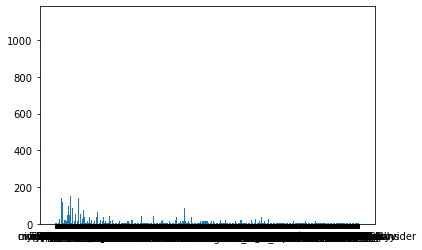

In [21]:
names = list(comments_dictionary.keys())
values = list(comments_dictionary.values())

plt.bar(range(len(comments_dictionary)), values, tick_label=names)
plt.show()

In [22]:
MAX_RESULTS=5
d = dict(list(upvotes_dictionary.items())[:MAX_RESULTS])

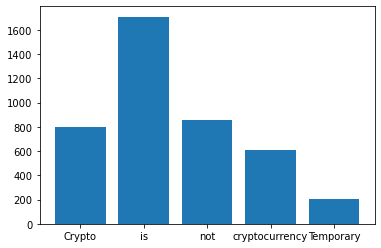

In [23]:
names = list(d.keys())
values = list(d.values())

plt.bar(range(len(d)), values, tick_label=names)
plt.show()

In [24]:
prime_numbers = [2, 3, 5, 7,"_", 9, 9,"_",131]

# remove 9 from the list
for i in prime_numbers:
    word = str(i)
    if word == "_":
        prime_numbers.remove(i)



# Updated prime_numbers List
print('Updated List: ', prime_numbers)

# Output: Updated List:  [2, 3, 5, 7, 11]

Updated List:  [2, 3, 5, 7, 9, 9, 131]
